In [5]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Flatten, Dropout

print("Packages Successfully Imported!")

Packages Successfully Imported!


In [45]:
trainDataGen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
trainingSet = trainDataGen.flow_from_directory("dataset/train", target_size = (128, 128), batch_size = 32, class_mode = "binary")

Found 2800 images belonging to 2 classes.


In [46]:
trainingSet.class_indices

{'no': 0, 'yes': 1}

In [47]:
validDataGen = ImageDataGenerator(rescale = 1./255)
validSet = validDataGen.flow_from_directory("dataset/valid", target_size = (128, 128), batch_size = 32, class_mode = "binary")

Found 200 images belonging to 2 classes.


In [48]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size = 3,  activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2, strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile(loss = "binary_crossentropy", optimizer='Adamax', metrics=["accuracy"])

In [50]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 64, 64, 64)       

In [51]:
metricVals = model.fit(x = trainingSet, validation_data = validSet, batch_size = 32,epochs = 30, verbose = 2)

Epoch 1/30
88/88 - 194s - loss: 5.2458 - accuracy: 0.6761 - val_loss: 2.9083 - val_accuracy: 0.4950
Epoch 2/30
88/88 - 193s - loss: 0.6339 - accuracy: 0.7425 - val_loss: 14.8244 - val_accuracy: 0.5000
Epoch 3/30
88/88 - 198s - loss: 0.5082 - accuracy: 0.7804 - val_loss: 5.2905 - val_accuracy: 0.4950
Epoch 4/30
88/88 - 202s - loss: 0.4323 - accuracy: 0.8089 - val_loss: 3.3215 - val_accuracy: 0.5400
Epoch 5/30
88/88 - 203s - loss: 0.4132 - accuracy: 0.8225 - val_loss: 3.4414 - val_accuracy: 0.5350
Epoch 6/30
88/88 - 206s - loss: 0.3528 - accuracy: 0.8496 - val_loss: 1.7950 - val_accuracy: 0.6100
Epoch 7/30
88/88 - 203s - loss: 0.3264 - accuracy: 0.8625 - val_loss: 0.7793 - val_accuracy: 0.7100
Epoch 8/30
88/88 - 204s - loss: 0.2967 - accuracy: 0.8743 - val_loss: 1.0851 - val_accuracy: 0.6750
Epoch 9/30
88/88 - 194s - loss: 0.2803 - accuracy: 0.8804 - val_loss: 0.5546 - val_accuracy: 0.7750
Epoch 10/30
88/88 - 196s - loss: 0.2575 - accuracy: 0.8979 - val_loss: 0.3837 - val_accuracy: 0.865

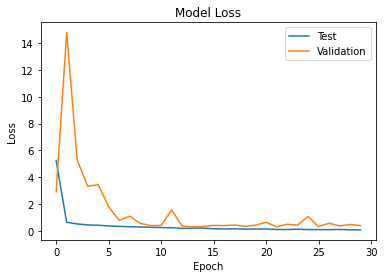

In [52]:
plt.plot(metricVals.history['loss'])
plt.plot(metricVals.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

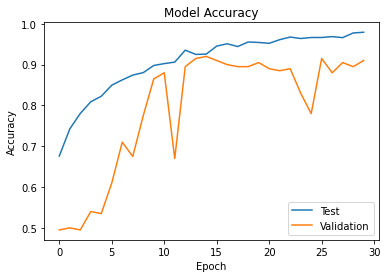

In [55]:
plt.plot(metricVals.history['accuracy'])
plt.plot(metricVals.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

In [56]:
model.save("BrainTumorClassifier.h5")

In [6]:
cnn = load_model("BrainTumorClassifier.h5")

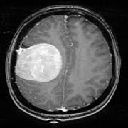

99.99995827674866 % chance of Brain Tumor.
Yes


In [23]:
# Yes 1
test = image.load_img("dataset/test/Y1.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

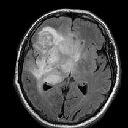

99.99565482139587 % chance of Brain Tumor.
Yes


In [24]:
# Yes 2
test = image.load_img("dataset/test/Y2.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

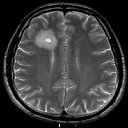

99.9933123588562 % chance of Brain Tumor.
Yes


In [25]:
# Yes 3
test = image.load_img("dataset/test/Y3.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

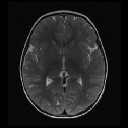

0.0002518693236197578 % chance of Brain Tumor.
No


In [26]:
# No 1
test = image.load_img("dataset/test/N1.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

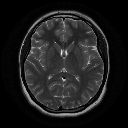

0.0038260775909293443 % chance of Brain Tumor.
No


In [27]:
# No 2
test = image.load_img("dataset/test/N2.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

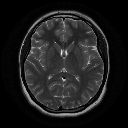

0.0038260775909293443 % chance of Brain Tumor.
No


In [28]:
# No 3
test = image.load_img("dataset/test/N2.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")